# Evaluate and Compare Optimizers

Test classes and functions from `optprob` module for comparing different optimization algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skopt

from optprob.problems import (
    solve_problem_with_optimizer, 
    solve_problem_with_optimizer_n_repeats
)
from optprob.plot_utils import convergence_plot, convergence_plot_n_repeats
from problems.toy_1d_problem import Toy1DProblem

import lpfgopt
lpfgopt.__version__

0.17499977934365754 2.5085382557867626


'1.0.1'

In [2]:
from platform import python_version
python_version()

'3.10.18'

## Optimization Problem Definition

### Example 1. Toy 1D Problem

In [5]:
# Test problem instance
problem = Toy1DProblem()
problem

Toy1DProblem(_name='Toy1DProblem', _guesses=[], _input_dim=1, _bounds=[(-5.0, 5.0)], _global_minimum=[2.5085382557867626])

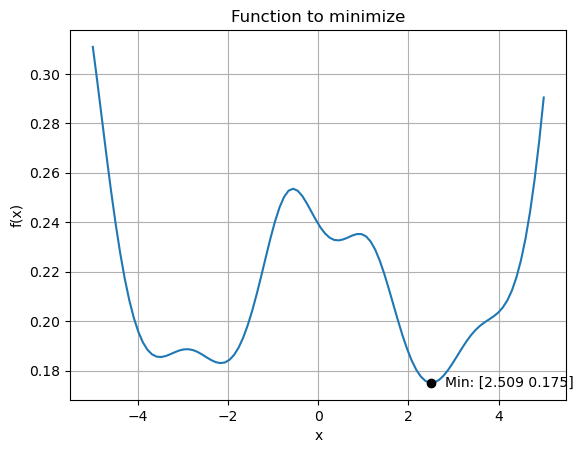

In [6]:
X = np.linspace(-5, 5, 100).reshape(1, -1)
Y = problem(X)

min_pt = np.array([problem.global_minimum[0], problem(problem.global_minimum)])

plt.plot(X.T, Y.T)
plt.plot(*min_pt, 'ko')
plt.annotate(f'Min: {min_pt.round(3)}', min_pt, xytext=(10, 0),
             textcoords='offset points', va='center')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function to minimize')
plt.grid()

In [7]:
rng = np.random.default_rng(0)
x0 = rng.uniform(*zip(*problem.bounds))
sol = solve_problem_with_optimizer(problem, scipy.optimize.minimize, x0, bounds=problem.bounds)
sol

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 0.17499977934672517
        x: [ 2.509e+00]
      nit: 5
      jac: [ 7.411e-07]
     nfev: 16
     njev: 8
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

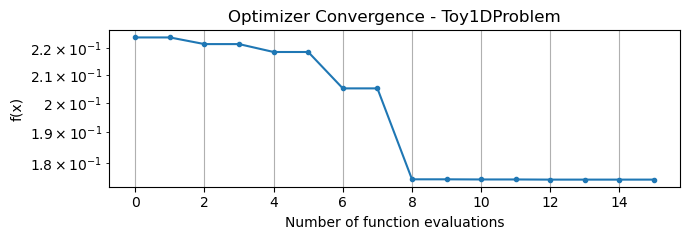

In [8]:
convergence_plot(problem)
plt.tight_layout()
plt.show()

In [9]:
solve_problem_with_optimizer(problem, lpfgopt.minimize, problem.bounds)

        best: [np.float64(0.18300814697357873), -2.1588285558875286]
 final_error: np.float64(9.9034632297431e-06)
         fun: np.float64(0.18300814697357873)
       maxcv: 0
     message: 'Tolerance condition satisfied'
        nfev: 277
         nit: 257
    pointset: [[np.float64(0.18300814697360035), -2.15882956630875], [np.float64(0.183008146973624), -2.1588299258188632], [np.float64(0.18300814697362505), -2.158827523980822], [np.float64(0.18300814697365841), -2.158827154733134], [np.float64(0.18300814697371512), -2.15883078925777], [np.float64(0.1830081469735861), -2.1588292398353675], [np.float64(0.18300814697362108), -2.158827575596595], [np.float64(0.18300814697357903), -2.158828932176433], [np.float64(0.18300814697365375), -2.158827200930459], [np.float64(0.18300814697358095), -2.1588284161442237], [np.float64(0.1830081469735894), -2.1588281326659904], [np.float64(0.18300814697359427), -2.1588280178428585], [np.float64(0.1830081469736334), -2.158827421544922], [np.float64(0

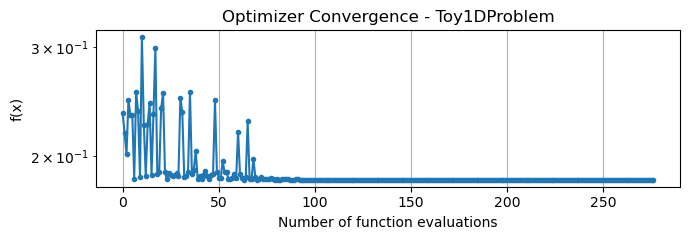

In [10]:
convergence_plot(problem)
plt.tight_layout()
plt.show()

In [12]:
fun_evals, unique_solutions, best_guesses = solve_problem_with_optimizer_n_repeats(problem, lpfgopt.minimize, 20, problem.bounds, tol=1e-6)
unique_solutions

100%|██████████| 20/20 [00:00<00:00, 67.42it/s]


Counter({(2.508538,): 17, (-2.158829,): 3})

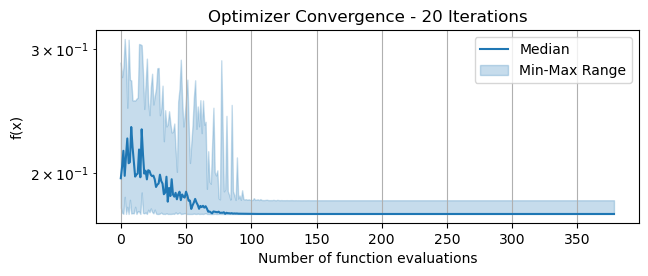

In [13]:
ax = convergence_plot_n_repeats(fun_evals)

In [14]:
min(best_guesses)

(np.float64(0.1749997793436575), [2.508538210796101])

## Bayesian Optimization

In [15]:
# Run Bayesian optimization
problem.reset()
res = skopt.gp_minimize(
    problem,            # the function to minimize
    problem.bounds,     # the bounds on each dimension of x
    n_calls=50,
    noise=1e-10,
    random_state=0,
    n_initial_points=10,
)
res

          fun: 0.17499984847992295
            x: [2.5072929577707797]
    func_vals: [ 2.353e-01  1.955e-01 ...  1.756e-01  1.754e-01]
      x_iters: [[0.9284461822501839], [3.442657485810175], [3.57945617622757], [3.472517387841256], [1.2356369678597243], [-1.1561829270730009], [-2.0246539345552765], [-4.432870226825568], [-2.2734370541988675], [-0.22334882678650025], [5.0], [2.5030594692913137], [-3.2221318696656196], [2.743344028134663], [-2.8069034687684584], [2.317653026177748], [2.557596688912204], [-5.0], [2.5189660786095116], [-3.7564665277672393], [4.292437907269585], [1.899371734104025], [-1.6517761649824632], [0.3222397301344948], [-3.5034307569808063], [3.029664927966447], [-4.061359949586361], [3.997995038411373], [-2.526741066995071], [2.5279331268239247], [2.5217513951707353], [2.604702868396748], [2.491545826479779], [2.4375392268522713], [2.560639771259643], [2.441180995888824], [2.4840975816507127], [2.4454324764558617], [2.48505723377297], [2.413420828004514], [2.43

In [16]:
res['x'], res['fun']

([2.5072929577707797], np.float64(0.17499984847992295))

In [17]:
problem.best_guess

(np.float64(0.17499984847992295), [2.5072929577707797])

In [18]:
fun_evals, unique_solutions, best_guesses = solve_problem_with_optimizer_n_repeats(
    problem, skopt.gp_minimize, 20, problem.bounds, noise=1e-10, n_calls=50
)
unique_solutions

100%|██████████| 20/20 [05:10<00:00, 15.55s/it]


Counter({(2.512081,): 1,
         (2.508925,): 1,
         (2.511324,): 1,
         (2.50792,): 1,
         (2.508203,): 1,
         (2.507558,): 1,
         (2.508132,): 1,
         (2.506129,): 1,
         (2.506556,): 1,
         (2.505382,): 1,
         (2.50854,): 1,
         (2.508425,): 1,
         (2.506604,): 1,
         (2.509333,): 1,
         (2.50995,): 1,
         (2.50929,): 1,
         (2.509291,): 1,
         (2.508538,): 1,
         (2.510233,): 1,
         (2.508744,): 1})

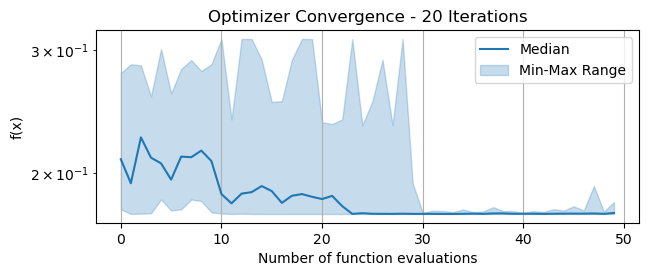

In [19]:
ax = convergence_plot_n_repeats(fun_evals)

In [20]:
min(best_guesses)

(np.float64(0.17499977934365754), [2.5085381998603147])